Handle imports and paths

In [1]:
import sys
sys.path.append('/mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/') 
sys.path.append('/mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/functions/') 
from paths_and_imports import *
from control_flow_functions import *
%load_ext autoreload
%autoreload 2

=== Figures ===

Age Gap of CNs and ADs

(-0.5, 1099.5, 599.5, -0.5)

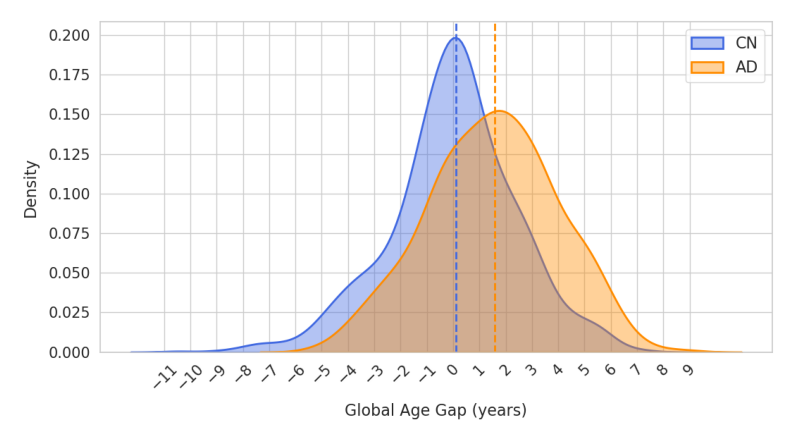

In [13]:
# File path to second image
file_path = f'{output_dir}CN_AD_AGs.png'

# Load and plot
img = mpimg.imread(file_path)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')

CN, AD, and AD-CN Test Sets

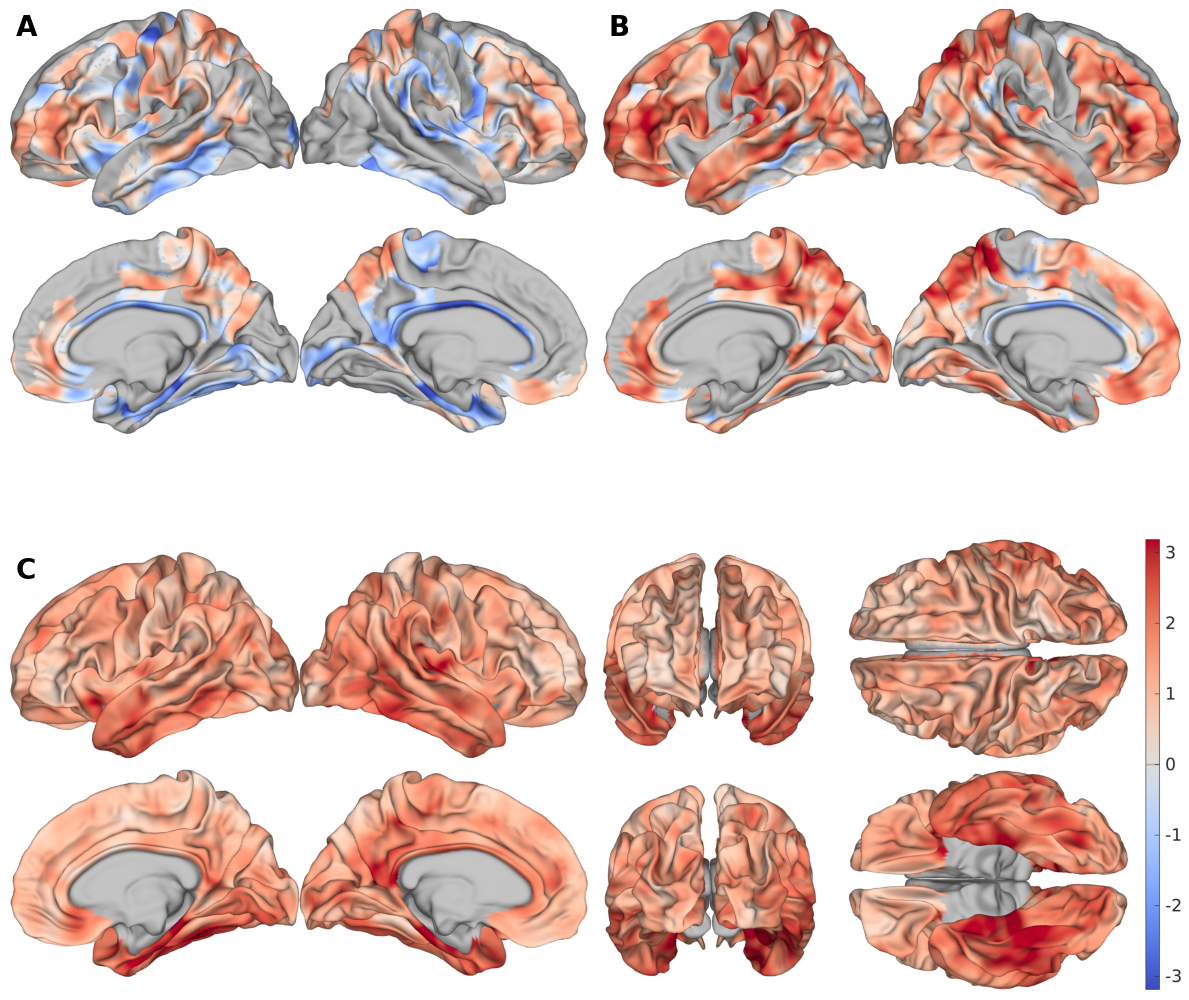

In [14]:
plot_paths = [
    f'{output_dir}test_CN_corrected_ME_data_latL_latR_medR_medL.png',
    f'{output_dir}test_AD_corrected_ME_data_latL_latR_medR_medL.png', 
    f'{output_dir}AD-CN_corrected_ME_data_latL_latR_medR_medL.png',
    f'{output_dir}AD-CN_corrected_ME_data_ant_dor_pos_ven.png'
]

# Labels for the subplots
subplot_labels = ['A', 'B', 'C', '']

# Plot the generated images
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.ravel()

# Iterate over the images and their corresponding axes
for i, (ax, path) in enumerate(zip(axes, plot_paths)):
    img = mpimg.imread(path)
    ax.imshow(img)
    ax.axis('off')  # Turn off axis labels and ticks
    ax.text(0.01, 0.99, subplot_labels[i], transform=ax.transAxes,
            fontsize=20, fontweight='bold', va='top', ha='left',
            bbox=dict(facecolor='white', edgecolor='none'))

plt.tight_layout()

Cognitive Test Results, Global and Local

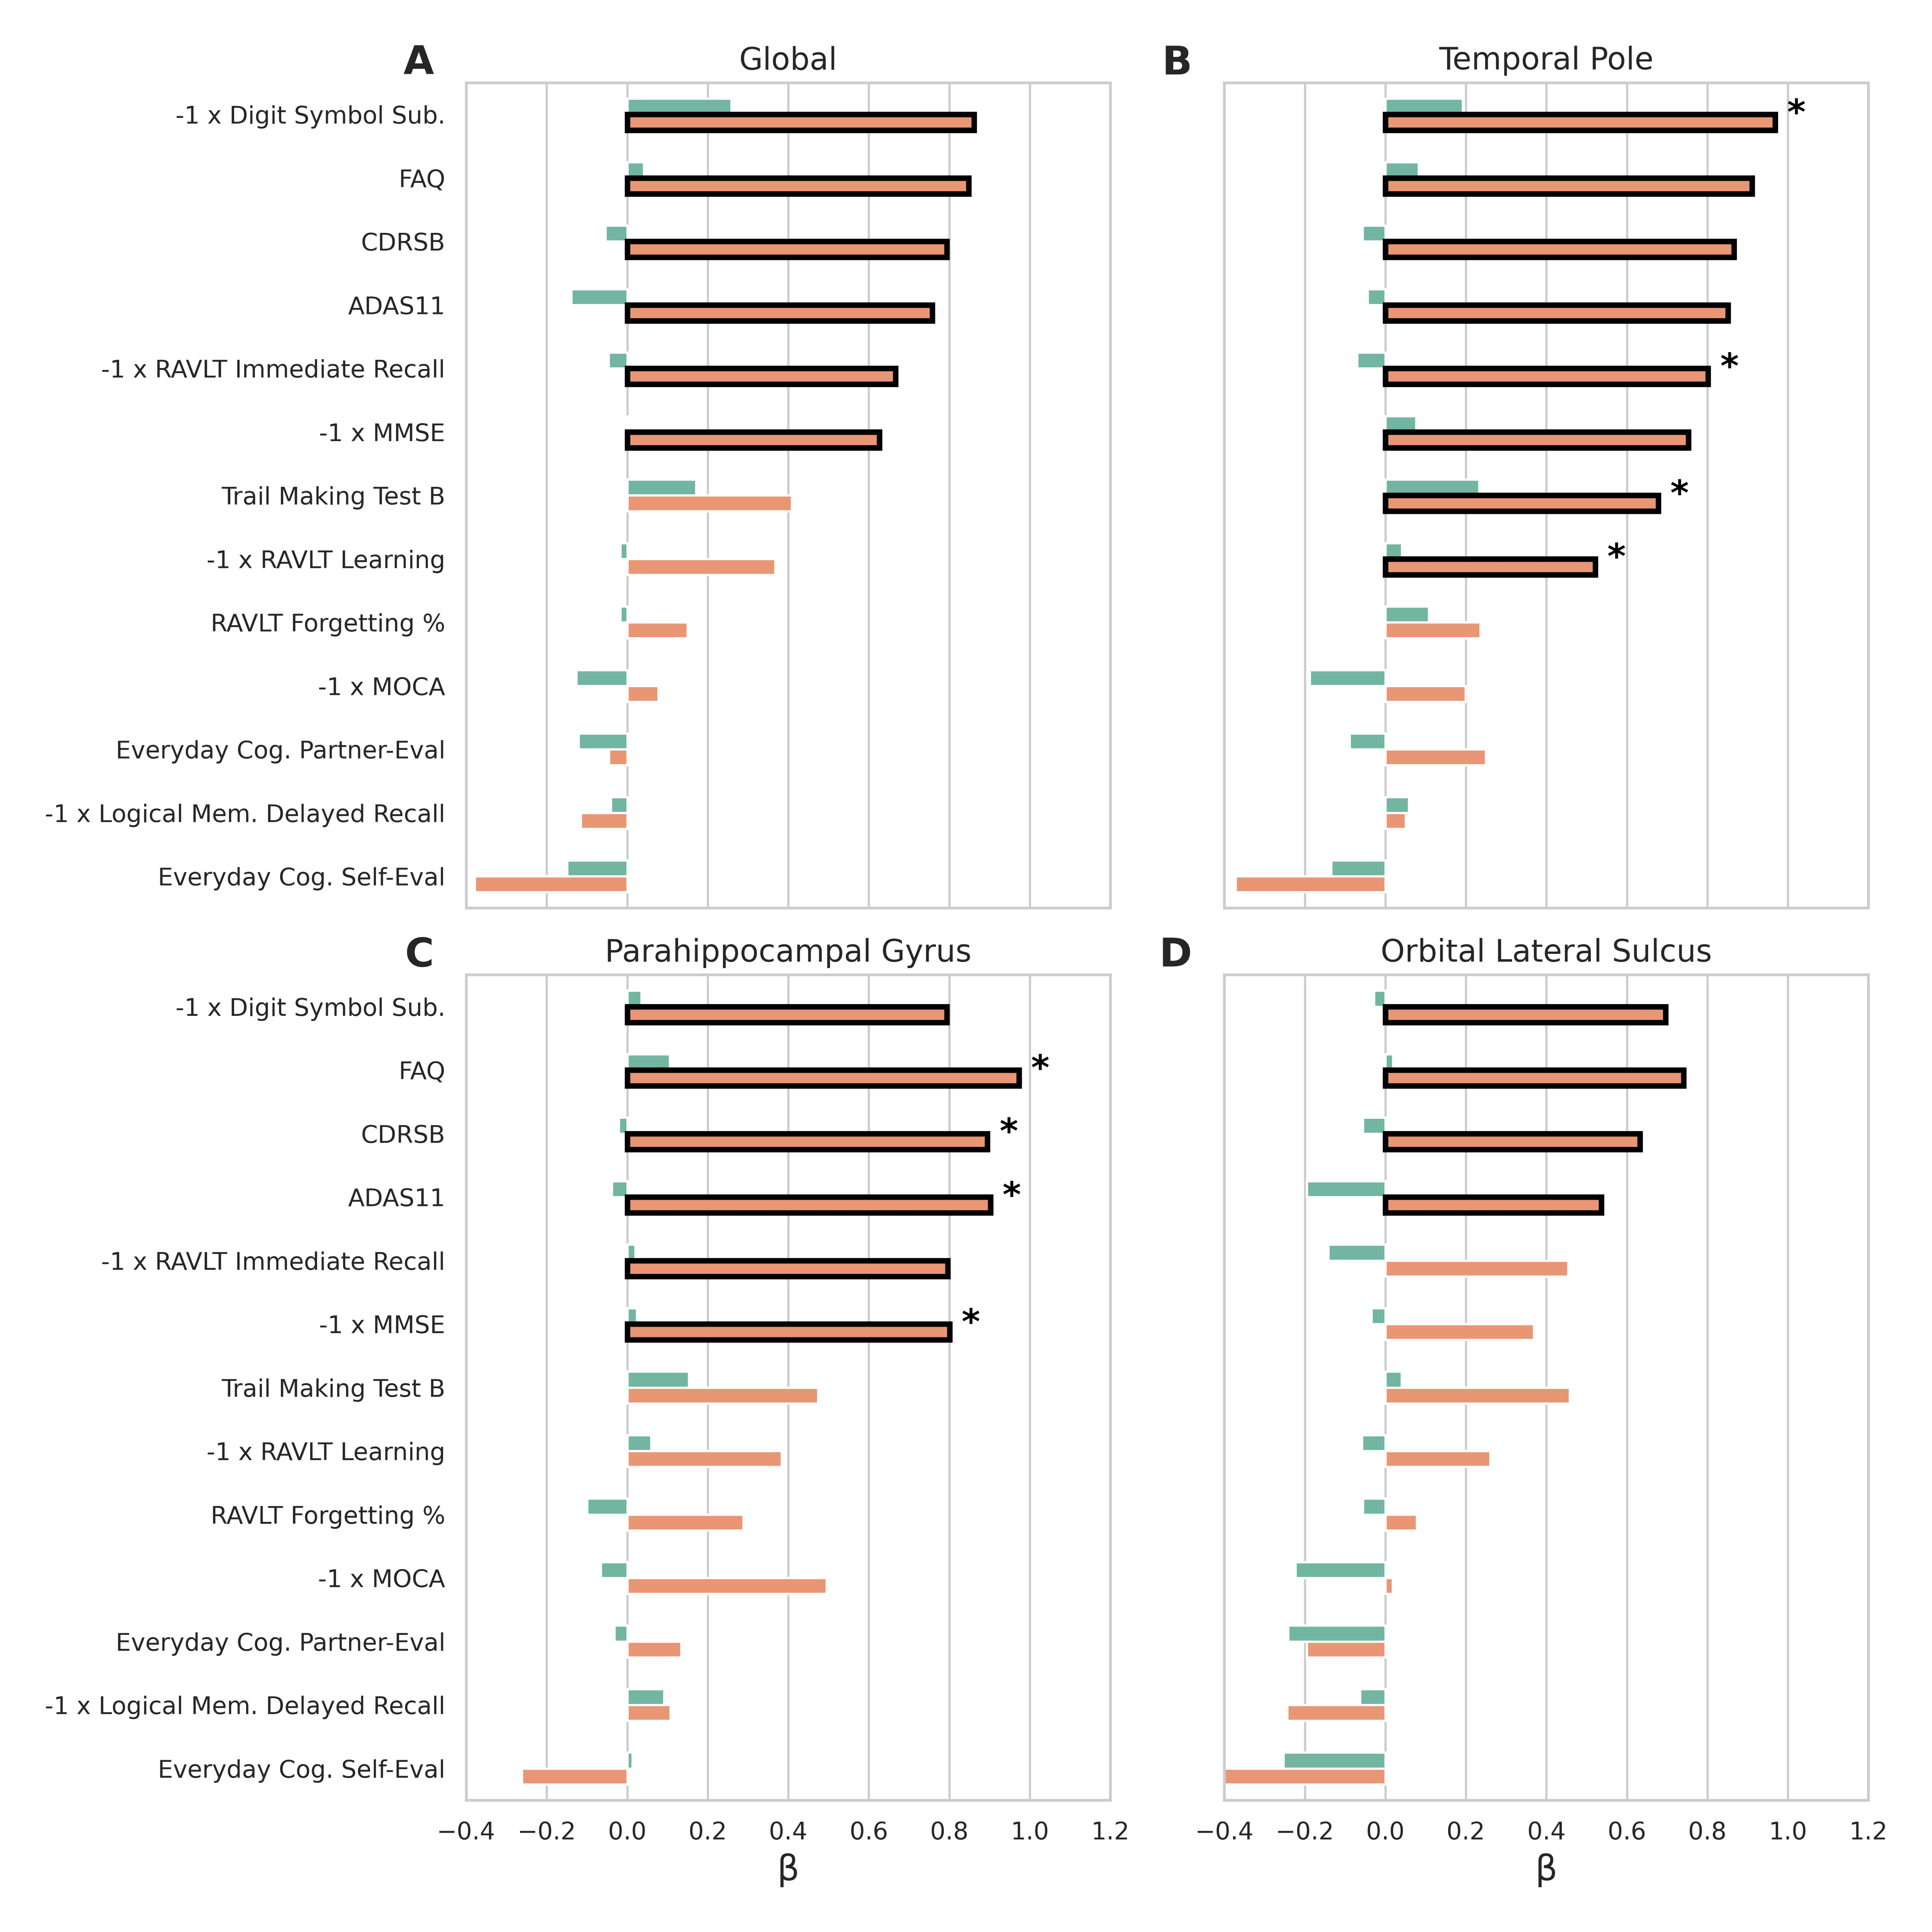

In [2]:
# Path to the global image
img_path = f'{output_dir}local_cog_barplot.png'

# Load and display the image
img = mpimg.imread(img_path)

fig, ax = plt.subplots(figsize=(12, 12), dpi=500)  # Adjust size as needed
ax.imshow(img)
ax.axis('off')
plt.tight_layout()

=== Tables ===

Training Set

In [16]:
older_datasets = [ds for ds in datasets if ds['name'] in ['UKBB', 'NACC', 'IXI', 'ADNI_CN', 'ADNI_AD']]
older_stats = get_dataset_statistics(older_datasets); older_stats.style.hide(axis="index") # training and testing

repository,set,N,min,max,μ,σ,M:F
UKBB,training,9619,45.5,82.4,64.8,7.8,1 / 1.1
NACC,training,4151,18.9,100.2,69.4,10.9,1 / 2.0
IXI,training,480,20.0,86.3,50.9,16.1,1 / 1.3
ADNI_CN,testing,1129,55.5,104.3,75.7,6.8,1 / 1.0
ADNI_AD,testing,477,55.2,93.0,76.1,8.1,1 / 0.9
All Training,combined,14250,18.9,100.2,65.7,9.8,1 / 1.3


=== Supplementary Figures ===

Female and Male G-BAGs (bootstrapped)

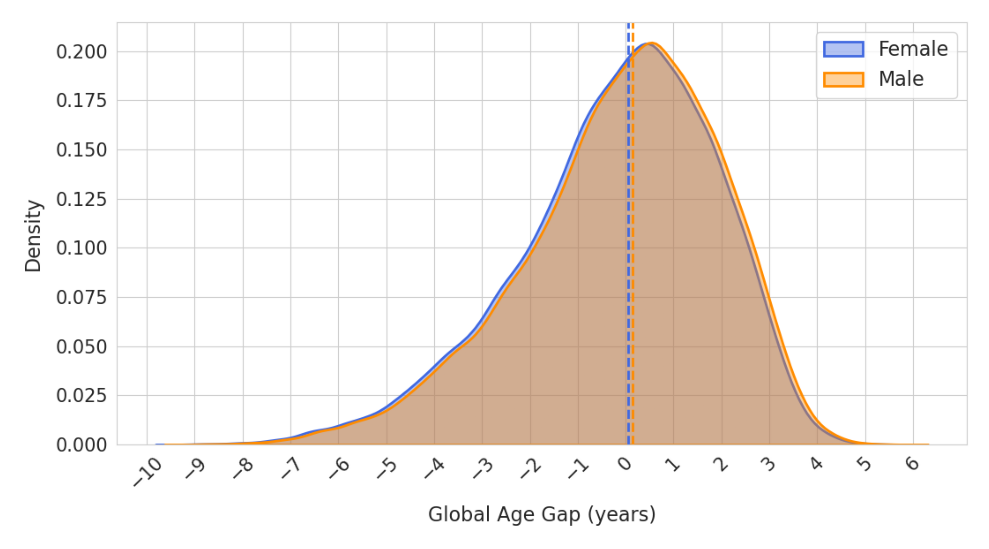

In [7]:
# File paths
image_files = [
    f'{output_dir}f_m_AGs.png'
]

# Create figure and single axis
fig, ax = plt.subplots(figsize=(10, 12))

# Load and display image
img = mpimg.imread(image_files[0])
ax.imshow(img)
ax.axis('off')

# Adjust layout
plt.tight_layout()

=== Supplementary Tables ===

All AD-CN regions

In [2]:
# Get the df and sort it 
df = pd.read_csv(f'{output_dir}AD-CN_age_gaps.csv')
df = df.sort_values(by='age_gap', ascending=False)

# Format and display the df
column_order = ['region', 'hemi', 'age_gap', 'region_avg', 't_stat', 'raw_pval', 'adj_pval']
df = df[column_order]
df['raw_pval'] = df['raw_pval'].apply(lambda x: f"{x:.2e}")
df['adj_pval'] = df['adj_pval'].apply(lambda x: f"{x:.2e}")
df = df.round(2)
df.to_excel(f'{output_dir}Supplementary_Table_1.xlsx')
print(df.to_string(index=False))

                   region hemi  age_gap  region_avg  t_stat  raw_pval  adj_pval
    G_oc-temp_med-Parahip   rh     2.79        2.72   37.01 4.10e-191 8.67e-190
            S_oc-temp_lat   rh     2.73        2.27   21.91  3.15e-75  7.39e-75
    G_temp_sup-G_T_transv   rh     2.72        2.15   27.48  1.22e-84  3.55e-84
    G_oc-temp_lat-fusifor   rh     2.69        2.30   44.91 5.63e-236 2.08e-234
    G_oc-temp_med-Parahip   lh     2.65        2.72   22.46  6.89e-93  2.61e-92
    S_temporal_transverse   rh     2.52        2.17   21.42  4.16e-52  7.15e-52
    G_temp_sup-Plan_polar   rh     2.42        2.34   18.88  1.56e-58  2.97e-58
      S_collat_transv_ant   rh     2.41        2.09   31.25 4.02e-121 3.13e-120
           G_temporal_inf   rh     2.37        2.21   45.13 3.27e-253 1.61e-251
            Pole_temporal   lh     2.37        2.28   29.70 1.56e-132 1.92e-131
     S_collat_transv_post   rh     2.29        2.17   29.93  5.00e-73  1.14e-72
    G_temp_sup-Plan_polar   lh     2.26 

All Cognitive Test Metrics

In [3]:
df = pd.read_csv(f'{output_dir}local_cog_tests.csv')
columns_to_display = ['cohort', 'region', 'hemi', 'test', 'coef', 'r_squared', 'adj_pval']
df = df[columns_to_display]

# Sort within each cohort and region by coef descending
df_sorted = df.groupby(['cohort', 'region'], group_keys=False).apply(
    lambda d: d.sort_values('coef', ascending=False))

# Display without index in Jupyter
df.to_excel(f'{output_dir}Supplementary_Table_2.xlsx')
display(df_sorted.style.hide(axis='index'))

cohort,region,hemi,test,coef,r_squared,adj_pval
AD,G_oc-temp_med-Parahip,both,FAQ,0.973016,0.269570,0.000002
AD,G_oc-temp_med-Parahip,both,ADAS11,0.902573,0.242707,0.000006
AD,G_oc-temp_med-Parahip,both,CDRSB,0.894910,0.254141,0.000005
AD,G_oc-temp_med-Parahip,both,MMSE,0.801077,0.228558,0.000033
AD,G_oc-temp_med-Parahip,both,RAVLT_immediate,0.796327,0.202462,0.000105
AD,G_oc-temp_med-Parahip,both,DIGITSCOR,0.794011,0.191106,0.010900
AD,G_oc-temp_med-Parahip,both,MOCA,0.494736,0.284201,0.140751
AD,G_oc-temp_med-Parahip,both,TRABSCOR,0.473917,0.098081,0.128740
AD,G_oc-temp_med-Parahip,both,RAVLT_learning,0.383763,0.132786,0.070126
AD,G_oc-temp_med-Parahip,both,RAVLT_perc_forgetting,0.288294,0.114250,0.190021


All Female-Male regions

In [4]:
# Get the df and sort it 
df = pd.read_csv(f'{output_dir}f-m_age_gaps.csv')
df = df.sort_values(by='age_gap', ascending=False)

# Format and display the df
column_order = ['region', 'hemi', 'age_gap', 'region_avg', 't_stat', 'raw_pval', 'adj_pval']
df = df[column_order]
df.to_excel(f'{output_dir}Supplementary_Table_3.xlsx')
print(df.to_string(index=False))

                   region hemi   age_gap  region_avg    t_stat  raw_pval  adj_pval
            G_subcallosal   lh -0.039788   -0.064738 -0.159542  0.873506  0.873506
             S_suborbital   lh -0.050325   -0.077784 -0.301119  0.763619  0.768813
     S_interm_prim-Jensen   lh -0.064937   -0.094164 -0.664550  0.506927  0.551656
     G_and_S_frontomargin   lh -0.073051   -0.091862 -1.533305  0.125879  0.317071
     Lat_Fis-ant-Vertical   lh -0.073493   -0.084207 -0.707404  0.480192  0.538397
    G_and_S_occipital_inf   rh -0.074324   -0.086263 -0.845912  0.397984  0.478875
     S_orbital_med-olfact   lh -0.075738   -0.080799 -0.514467  0.607216  0.628447
           G_parietal_sup   lh -0.077887   -0.106602 -1.454040  0.146091  0.352411
       G_occipital_middle   rh -0.079279   -0.093493 -0.941266  0.346787  0.445588
              S_front_inf   lh -0.080431   -0.092804 -0.828796  0.407395  0.482356
   G_and_S_cingul-Mid-Ant   rh -0.081317   -0.086445 -0.930622  0.352255  0.445588
  G_